# Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings ('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn import utils 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics,svm
from sklearn.feature_selection import RFE

from matplotlib.pyplot import xticks


In [2]:
lead_df=pd.read_csv("Leads.csv")
lead_df.head()  

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead_df.shape

(9240, 37)

In [4]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
lead_df.convert_objects(convert_numeric=True)
#lead_df.info()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.00,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


## Data cleaning

In [7]:
#deleted clumns having same values
columns=['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Do Not Email','A free copy of Mastering The Interview','City','Country','Prospect ID']

In [8]:
lead_df = lead_df.drop(columns, axis=1)
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,Interested in other courses,Low in Relevance,Select,02.Medium,02.Medium,15.0,15.0,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,Ringing,NaN,Select,02.Medium,02.Medium,15.0,15.0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,Will revert after reading the email,Might be,Potential Lead,02.Medium,01.High,14.0,20.0,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Ringing,Not Sure,Select,02.Medium,01.High,13.0,17.0,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,Will revert after reading the email,Might be,Select,02.Medium,01.High,15.0,18.0,Modified


In [9]:
round(100*(lead_df.isnull().sum())/len(lead_df), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     29.32
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetriq

In [10]:
#list of missing columns
missing_value_columns = lead_df.columns[100*(lead_df.isnull().sum()/len(lead_df.index)) > 45]
list(missing_value_columns)

['Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [11]:
# Since there are more percentage of null values in these columns it won't make any sense in having them in the dataframe
# Lets remove all these columns which are having null values more than 45%

lead_df = lead_df.drop(missing_value_columns, axis=1)
lead_df.shape

(9240, 15)

In [12]:
round(100*(lead_df.isnull().sum())/len(lead_df), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Profile                                     29.32
Last Notable Activity                             0.00
dtype: float64

In [13]:
lead_df.fillna(lead_df.mean(),inplace=True)

In [14]:
round(100*(lead_df.isnull().sum())/len(lead_df), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Profile                                     29.32
Last Notable Activity                             0.00
dtype: float64

In [15]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9240 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9240 non-null float64
Last Activity                                    9137 non-null object
Specialization                                   7802 non-null object
How did you hear about X Education               7033 non-null object
What is your current occupation                  6550 non-null object
What matters most to you in choosing a course    6531 non-null object
Tags                                             5887 

In [16]:
cols=['Specialization','How did you hear about X Education','Last Activity','Lead Source','What is your current occupation','What matters most to you in choosing a course','Tags','Lead Profile']
lead_df[cols]=lead_df[cols].fillna(lead_df.mode().iloc[0])

In [17]:
round(100*(lead_df.isnull().sum())/len(lead_df), 2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Tags                                             0.0
Lead Profile                                     0.0
Last Notable Activity                            0.0
dtype: float64

no any missing values

In [18]:
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Profile,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,Interested in other courses,Select,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,Ringing,Select,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,Will revert after reading the email,Potential Lead,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Ringing,Select,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,Will revert after reading the email,Select,Modified


## Data Exploration¶

When we look at the target variable[converted], it consists of 1(lead score converted ), 0(not converted).

In [19]:
# Since there are more percentage of null values in these columns it won't make any sense in having them in the dataframe
# Lets remove all these columns which are having null values more than 45%lead_df['Converted'].value_counts()

### performing univariate and bivariate analysis

In [20]:
# Overall converted  rate

round(np.mean(lead_df['Converted']), 2)

0.39

In [21]:
# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [22]:
# Defining a function to plot converted across different categorical variables

def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='Converted', data=lead_df)
    plt.show()

## 1.Lead Origin

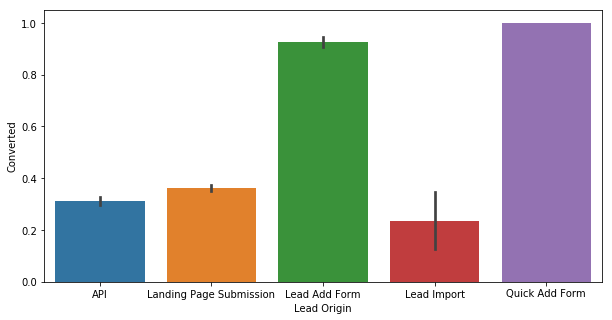

In [23]:
# Comparing the Lead Origin with the Converted 

plt.figure(figsize=(10, 5))
plot_cat('Lead Origin')

above shows the qick add form is greter 

## 2.Lead Source

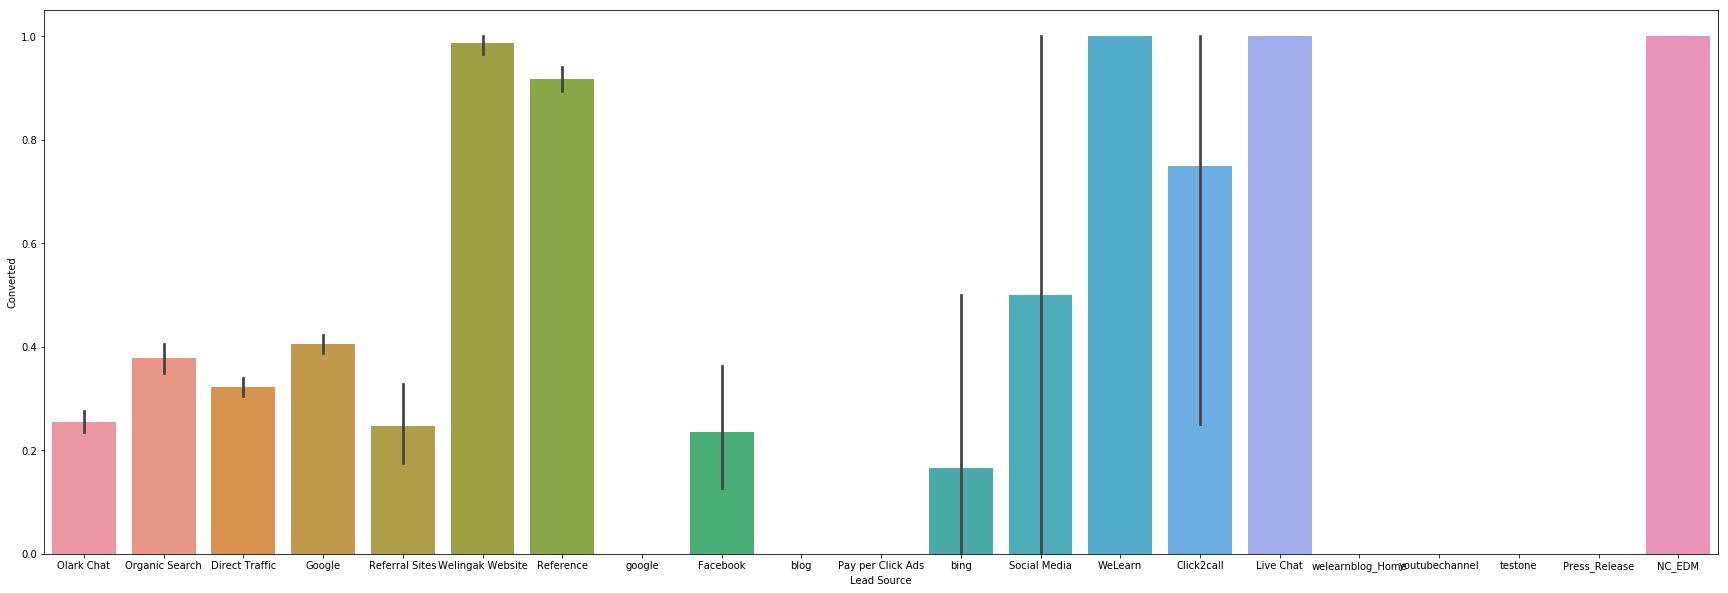

In [24]:
# Comparing the Lead Source with the Converted 

plt.figure(figsize=(30,10))
plot_cat('Lead Source')


## 3.Last Activity

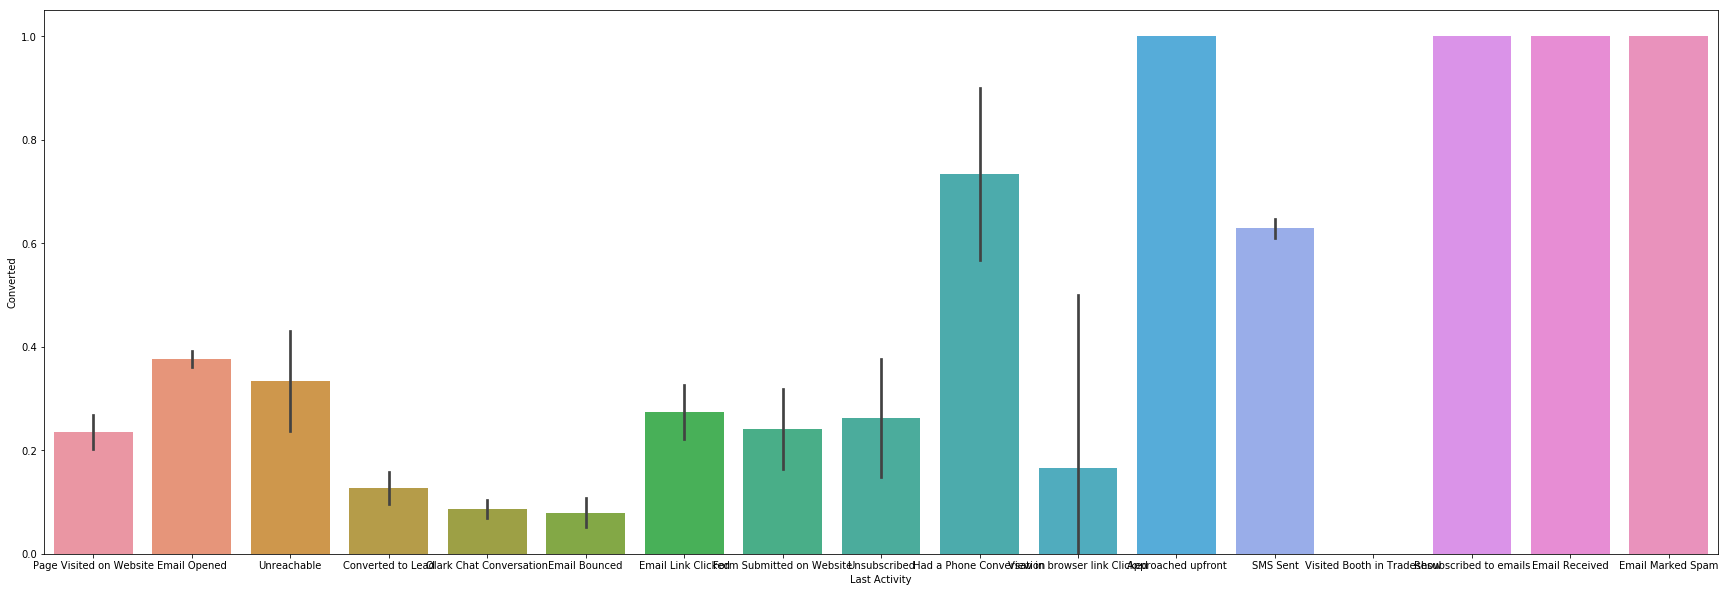

In [25]:
# Comparing the Last Activity with the Converted 

plt.figure(figsize=(30, 10))
plot_cat('Last Activity')



## 4.Specialization 

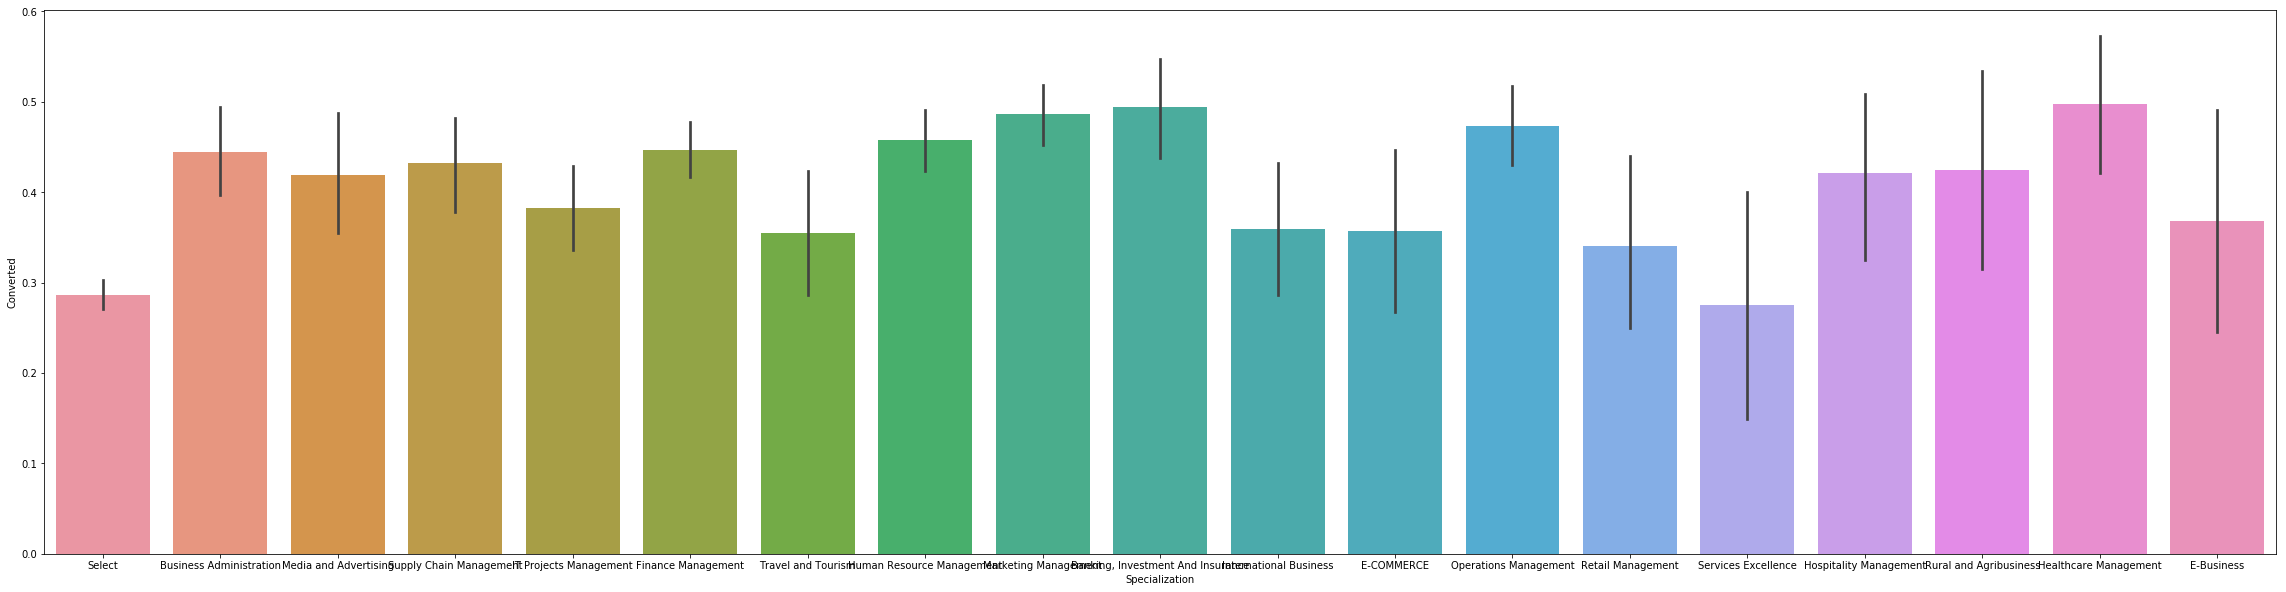

In [26]:
# Comparing the Specialization with the Converted 

plt.figure(figsize=(40, 10))
plot_cat('Specialization')


## 5. How did you hear about X Education

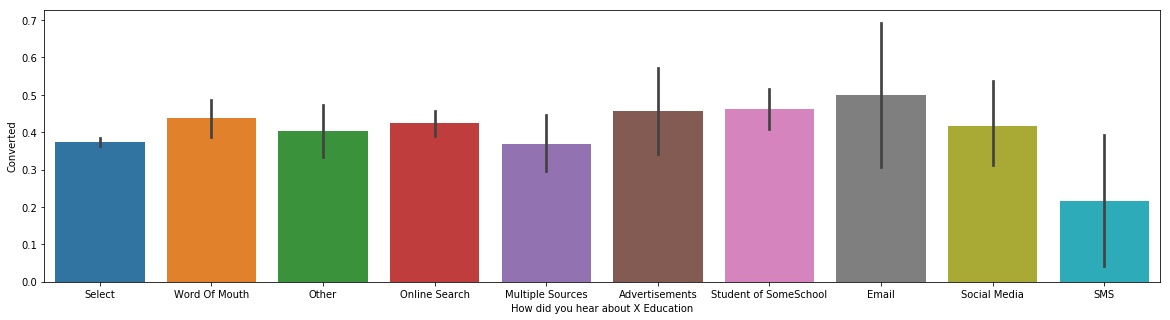

In [27]:
# Comparing the How did you hear about X Education with the Converted 

plt.figure(figsize=(20, 5))
plot_cat('How did you hear about X Education')

## 6.What is your current occupation

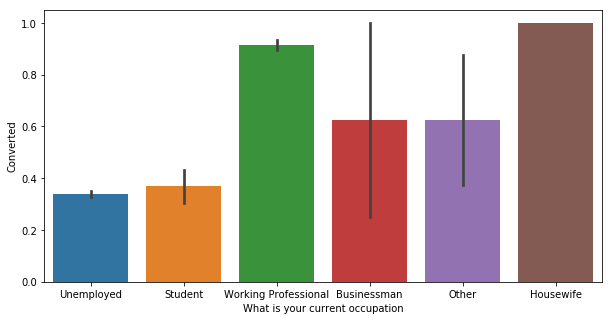

In [28]:
# Comparing the What is your current occupation  with the Converted 

plt.figure(figsize=(10, 5))
plot_cat('What is your current occupation')

## 7.What matters most to you in choosing a course

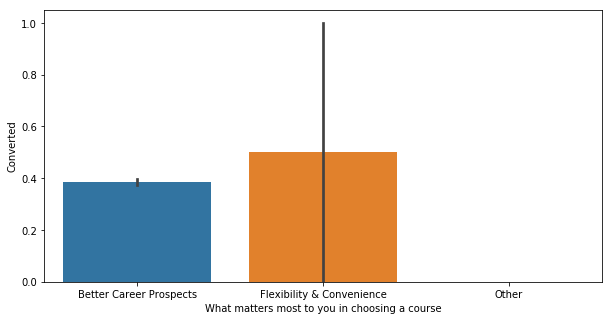

In [29]:
# Comparing the What matters most to you in choosing a course with the Converted 

plt.figure(figsize=(10, 5))
plot_cat('What matters most to you in choosing a course')

## 8.Tags

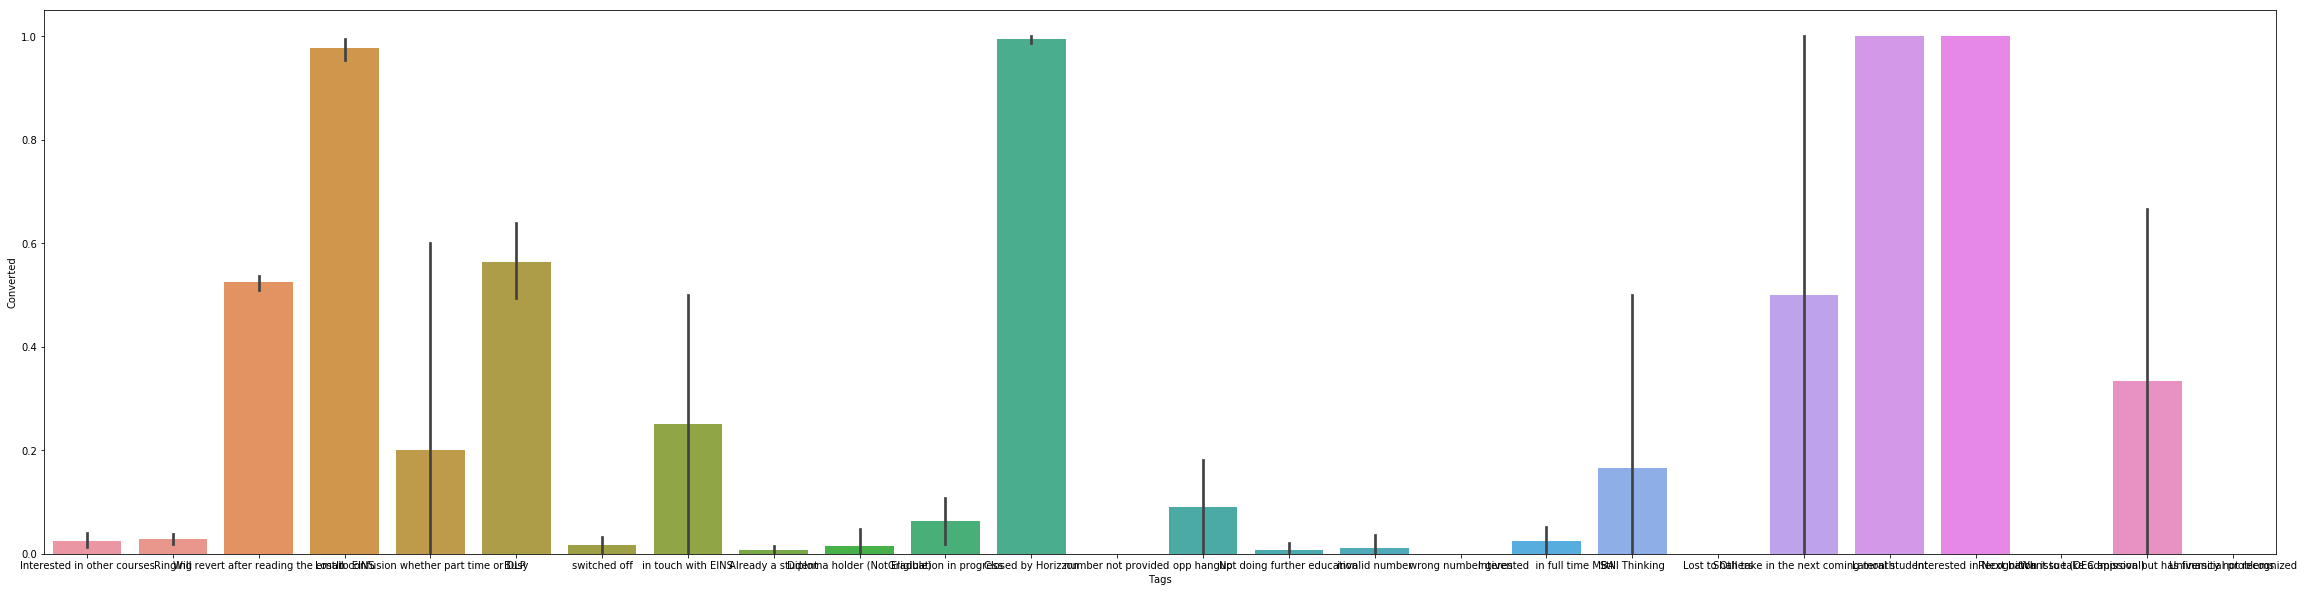

In [30]:
# Comparing the Tags with the Converted 

plt.figure(figsize=(40,10))
plot_cat('Tags')


## 9.Lead Profile

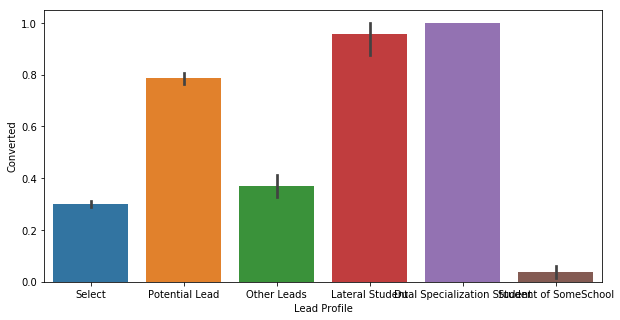

In [31]:
# Comparing the Lead Profile with the Converted 

plt.figure(figsize=(10, 5))
plot_cat('Lead Profile')

## 10.Last Notable Activity

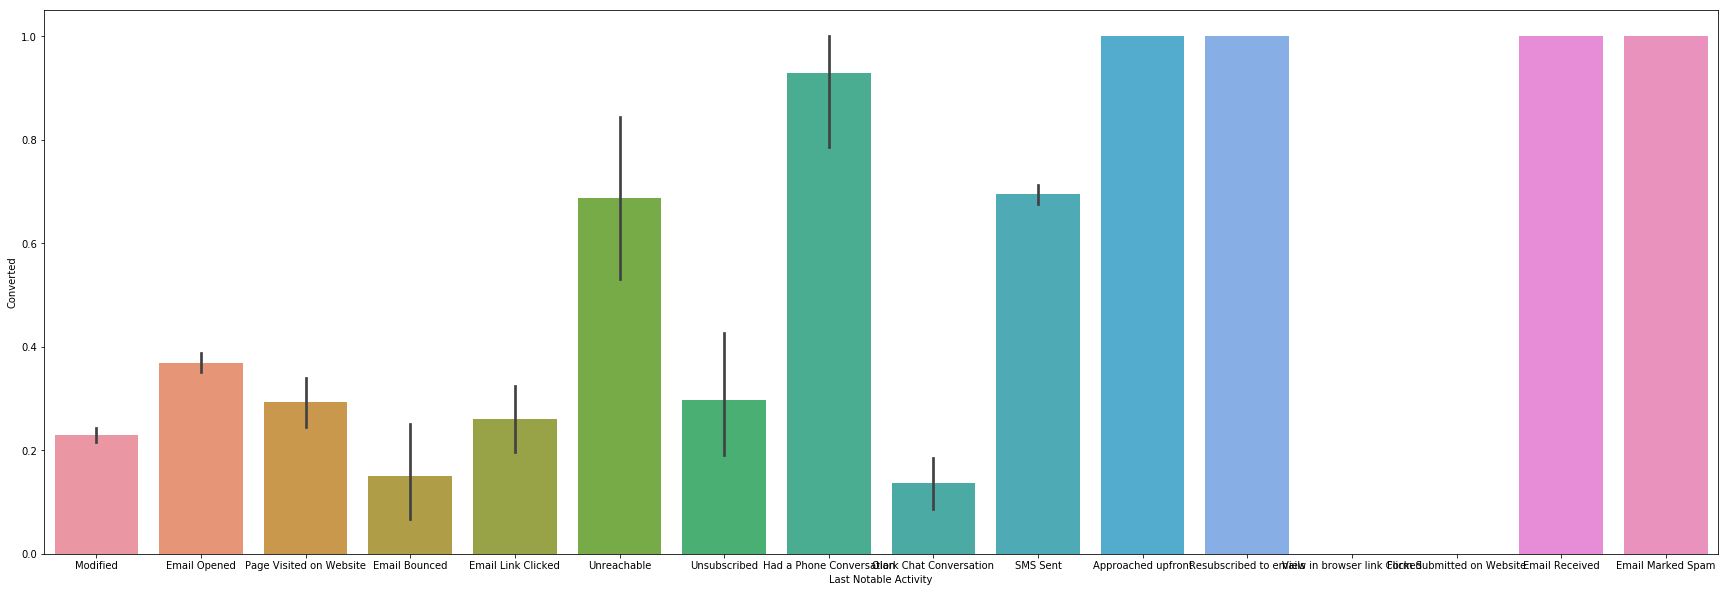

In [32]:
# Comparing the Last Notable Activity with the Converted 

plt.figure(figsize=(30, 10))
plot_cat('Last Notable Activity')


In [33]:
# Creating a new dataframe with these variables

selected_data = lead_df[['Lead Origin','Lead Source','Last Notable Activity','Lead Number','Lead Profile','What matters most to you in choosing a course','What is your current occupation','How did you hear about X Education','Specialization','Last Activity','Tags','Page Views Per Visit','Total Time Spent on Website','TotalVisits','Converted']].copy()
selected_data

,Lead Origin,Lead Source,Last Notable Activity,Lead Number,Lead Profile,What matters most to you in choosing a course,What is your current occupation,How did you hear about X Education,Specialization,Last Activity,Tags,Page Views Per Visit,Total Time Spent on Website,TotalVisits,Converted
0,API,Olark Chat,Modified,660737,Select,Better Career Prospects,Unemployed,Select,Select,Page Visited on Website,Interested in other courses,0.00000,0,0.000000,0
1,API,Organic Search,Email Opened,660728,Select,Better Career Prospects,Unemployed,Select,Select,Email Opened,Ringing,2.50000,674,5.000000,0
2,Landing Page Submission,Direct Traffic,Email Opened,660727,Potential Lead,Better Career Prospects,Student,Select,Business Administration,Email Opened,Will revert after reading the email,2.00000,1532,2.000000,1
3,Landing Page Submission,Direct Traffic,Modified,660719,Select,Better Career Prospects,Unemployed,Word Of Mouth,Media and Advertising,Unreachable,Ringing,1.00000,305,1.000000,0
4,Landing Page Submission,Google,Modified,660681,Select,Better Career Prospects,Unemployed,Other,Select,Converted to Lead,Will revert after reading the email,1.00000,1428,2.000000,1
5,API,Olark Chat,Modified,660680,Select,Better Career Prospects,Unemployed,Select,Select,Olark Chat Conversation,Will revert after reading the email,0.00000,0,0.000000,0
6,Landing Page Submission,Google,Modified,660673,Potential Lead,Better Career Prospects,Unemployed,Online Search,Supply Chain Management,Email Opened,Will revert after reading the email,2.00000,1640,2.000000,1
7,API,Olark Chat,Modified,660664,Select,Better Career Prospects,Unemployed,Select,Select,Olark Chat Conversation,Will revert after reading the email,0.00000,0,0.000000,0
8,Landing Page Submission,Direct Traffic,Email Opened,660624,Select,Better Career Prospects,Unemployed,Select,IT Projects Management,Email Opened,Will revert after reading the email,2.00000,71,2.000000,0
9,API,Google,Email Opened,660616,Select,Better Career Prospects,Unemployed,Word Of Mouth,Finance Management,Email Opened,Will revert after reading the email,4.00000,58,4.000000,0


In [34]:
# Creating dummies
dummies = pd.get_dummies(selected_data)
dummies.head()


,Lead Number,Page Views Per Visit,Total Time Spent on Website,TotalVisits,Converted,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost t

In [35]:
# Selecting dummies that are effecting the converted

selected_dummies = dummies.filter(['Lead Number','Page Views Per Visit','Total Time Spent on Website','TotalVisits','Converted','Lead Origin_Quick Add Form','Lead Profile_Dual Specialization Student','Last Notable Activity_Approached upfront','Last Notable Activity_Email Received','Last Notable Activity_Email Marked Spam','Last Notable Activity_Resubscribed to emails','Tags_Recognition issue (DEC approval)','What matters most to you in choosing a course_Flexibility & Convenience','What is your current occupation_Housewife','What is your current occupation_Businessman','How did you hear about X Education_Email','Specialization_Banking','Specialization_Finance Management','Investment And Insurance','Last Activity_Approached upfront','Lead Source_Welingak Website','Lead Source_Click2call','Lead Source_Live Chat','Lead Source_NC_EDM','Lead Origin_Lead Add Form'],axis=1)
selected_dummies

,Lead Number,Page Views Per Visit,Total Time Spent on Website,TotalVisits,Converted,Lead Origin_Quick Add Form,Lead Profile_Dual Specialization Student,Last Notable Activity_Approached upfront,Last Notable Activity_Email Received,Last Notable Activity_Email Marked Spam,Last Notable Activity_Resubscribed to emails,Tags_Recognition issue (DEC approval),What matters most to you in choosing a course_Flexibility & Convenience,What is your current occupation_Housewife,What is your current occupation_Businessman,How did you hear about X Education_Email,Specialization_Finance Management,Last Activity_Approached upfront,Lead Source_Welingak Website,Lead Source_Click2call,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Origin_Lead Add Form
0,660737,0.00000,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,660728,2.50000,674,5.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,660727,2.00000,1532,2.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,660719,1.00000,305,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,660681,1.00000,1428,2.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,660680,0.00000,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,660673,2.00000,1640,2.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,660664,0.00000,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,660624,2.00000,71,2.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,660616,4.00000,58,4.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [36]:
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Profile,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,Interested in other courses,Select,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,Ringing,Select,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,Will revert after reading the email,Potential Lead,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Ringing,Select,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,Will revert after reading the email,Select,Modified


## Splitting Data into Training and Test Sets

In [37]:
from sklearn.model_selection import train_test_split


In [38]:
#The varaible was imported as a string we need to convert it to float
#lead_df.convert_objects(convert_numeric=True)

In [39]:
char_cols=lead_df.dtypes.pipe(lambda x:x[x=='object']).index
for c in char_cols:
    lead_df[c]=pd.factorize(lead_df[c])[0]

In [40]:
X=lead_df.drop('Converted',axis=1)
y=lead_df['Converted']

In [41]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [42]:
import statsmodels.api as sm
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary

<bound method GLMResults.summary of <statsmodels.genmod.generalized_linear_model.GLMResults object at 0x0000015E9FB569E8>>

## Correlation Matrix

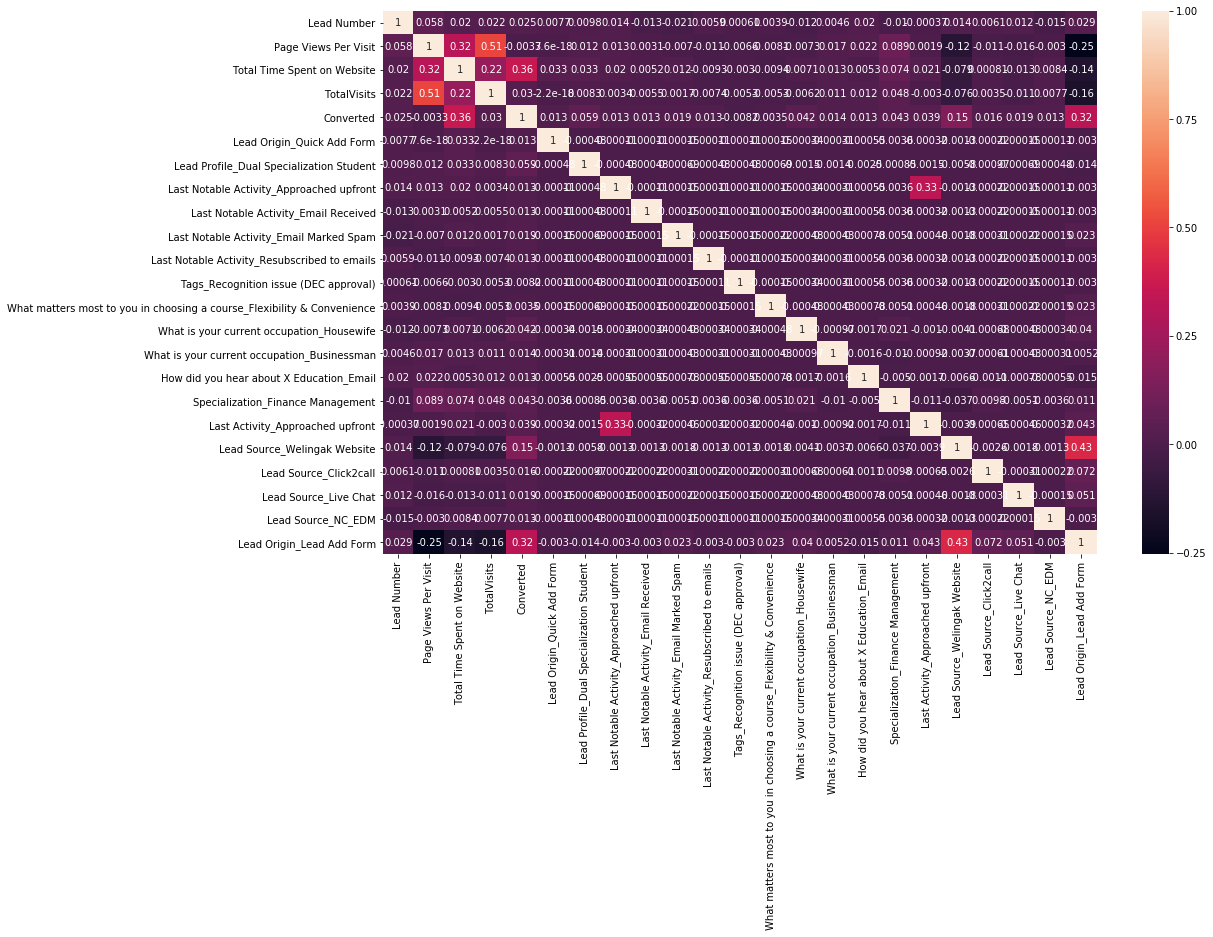

In [43]:

plt.figure(figsize = (16,10))  
sns.heatmap(selected_dummies.corr(),annot = True)

In [44]:
selected_dummies.corr()

,Lead Number,Page Views Per Visit,Total Time Spent on Website,TotalVisits,Converted,Lead Origin_Quick Add Form,Lead Profile_Dual Specialization Student,Last Notable Activity_Approached upfront,Last Notable Activity_Email Received,Last Notable Activity_Email Marked Spam,Last Notable Activity_Resubscribed to emails,Tags_Recognition issue (DEC approval),What matters most to you in choosing a course_Flexibility & Convenience,What is your current occupation_Housewife,What is your current occupation_Businessman,How did you hear about X Education_Email,Specialization_Finance Management,Last Activity_Approached upfront,Lead Source_Welingak Website,Lead Source_Click2call,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Origin_Lead Add Form
Lead Number,1.000000,5.819834e-02,0.020329,2.199255e-02,0.025157,7.747658e-03,0.009774,0.013549,-0.012616,-0.021031,0.005940,0.000615,0.003859,-0.011909,0.004577,0.019814,-0.010096,-0.000368,0.014201,0.006091,0.012135,-0.015217,0.029158
Page Views Per Visit,0.058198,1.000000e+00,0.316262,5.121246e-01,-0.003294,7.625915e-18,0.012205,0.012790,0.003090,-0.007050,-0.011459,-0.006609,-0.008103,-0.007312,0.016977,0.021731,0.089167,0.001918,-0.119162,-0.010795,-0.016206,-0.002972,-0.254007
Total Time Spent on Website,0.020329,3.162623e-01,1.000000,2.184091e-01,0.362483,3.283101e-02,0.032577,0.020092,0.005189,0.011675,-0.009259,-0.003032,-0.009363,0.007088,0.012526,0.005331,0.074260,0.021119,-0.078543,0.000809,-0.013095,0.008416,-0.139681
TotalVisits,0.021993,5.121246e-01,0.218409,1.000000e+00,0.030091,-2.174728e-18,0.008262,0.003357,0.005516,0.001694,-0.007439,-0.005280,-0.005260,-0.006153,0.011026,0.012476,0.047768,-0.003043,-0.076037,0.003476,-0.010521,0.007675,-0.160978
Converted,0.025157,-3.294266e-03,0.362483,3.009112e-02,1.000000,1.313825e-02,0.058817,0.013138,0.013138,0.018581,0.013138,-0.008238,0.003465,0.041567,0.014493,0.012509,0.043308,0.039432,0.154153,0.015591,0.018581,0.013138,0.321702
Lead Origin_Quick Add Form,0.007748,7.625915e-18,0.032831,-2.174728e-18,0.013138,1.000000e+00,-0.000485,-0.000108,-0.000108,-0.000153,-0.000108,-0.000108,-0.000153,-0.000342,-0.000306,-0.000553,-0.003575,-0.000325,-0.001300,-0.000217,-0.000153,-0.000108,-0.003020
Lead Profile_Dual Specialization Student,0.009774,1.220545e-02,0.032577,8.262022e-03,0.058817,-4.845483e-04,1.000000,-0.000485,-0.000485,-0.000685,-0.000485,-0.000485,-0.000685,-0.001533,-0.001371,-0.002474,-0.000853,-0.001454,-0.005819,-0.000969,-0.000685,-0.000485,-0.013519
Last Notable Activity_Approached upfront,0.013549,1.278958e-02,0.020092,3.356935e-03,0.013138,-1.082368e-04,-0.000485,1.000000,-0.000108,-0.000153,-0.000108,-0.000108,-0.000153,-0.000342,-0.000306,-0.000553,-0.003575,0.333189,-0.001300,-0.000217,-0.000153,-0.000108,-0.003020
Last Notable Activity_Email Received,-0.012616,3.090143e-03,0.005189,5.516067e-03,0.013138,-1.082368e-04,-0.000485,-0.000108,1.000000,-0.000153,-0.000108,-0.000108,-0.000153,-0.000342,-0.000306,-0.000553,-0.003575,-0.000325,-0.001300,-0.000217,-0.000153,-0.000108,-0.003020
Last Notable Activity_Email Marked Spam,-0.021031,-7.049721e-03,0.011675,1.694043e-03,0.018581,-1.530783e-04,-0.000685,-0.000153,-0.000153,1.000000,-0.000153,-0.000153,-0.000216,-0.000484,-0.000433,-0.000782,-0.005057,-0.000459,-0.001838,-0.000306,-0.000216,-0.000153,0.023210


In [45]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3049.6
Date:                Mon, 26 Aug 2019   Deviance:                       6099.2
Time:                        10:38:02   Pearson chi2:                 6.96e+03
No. Iterations:                     5   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -9.4938      0.915    -10.381      0.000     -11.286      -7.701
Lead Number                                    1.157e-05   1.46e-06      7.935      0.000    8.71e-06    1.44e-05
Lead Origin                                       0.4578      0.070      6.522      0.000       0.320       0.595
Lead Source                                       0.1521      0.025      6.119      0.000       0.103       0.201
TotalVisits                                       0.0191      0.008      2.405      0.016       0.004       0.035
Total Time Spent on Website                       0.0016   6.42e-05     25.602      0.000       0.002       0.002
Page Views Per Visit                             -0.2363      0.021    -11.049      0.000      -0.278      -0.194
Last Activity                                     0.0324      0.010      3.377      0.001       0.014       0.051
Specialization                                   -0.0014      0.008     -0.183      0.855      -0.017       0.014
How did you hear about X Education               -0.0265      0.020     -1.346      0.178      -0.065       0.012
What is your current occupation                   1.1293      0.072     15.773      0.000       0.989       1.270
What matters most to you in choosing a course    -0.5068      1.546     -0.328      0.743      -3.538       2.524
Tags                                             -0.0411      0.009     -4.512      0.000      -0.059      -0.023
Lead Profile                                      0.1844      0.034      5.502      0.000       0.119       0.250
Last Notable Activity                             0.1796      0.013     14.182      0.000       0.155       0.204
=================================================================================================================
"""

## Feature Selection Using RFE

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 14)             # running RFE with 14 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)     

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [47]:
len(X_train.columns)

14

In [48]:
X_train.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Profile',
       'Last Notable Activity'],
      dtype='object')

In [49]:
#variable selected by rfe
col=['Lead Number', 'Lead Origin', 'Lead Source', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Profile',
       'Last Notable Activity']

In [50]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
#logsk.fit(X_train[col], y_train)
logsk.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [51]:
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3049.6
Date:                Mon, 26 Aug 2019   Deviance:                       6099.2
Time:                        10:38:03   Pearson chi2:                 6.96e+03
No. Iterations:                     5   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -9.4938      0.915    -10.381      0.000     -11.286      -7.701
Lead Number                                    1.157e-05   1.46e-06      7.935      0.000    8.71e-06    1.44e-05
Lead Origin                                       0.4578      0.070      6.522      0.000       0.320       0.595
Lead Source                                       0.1521      0.025      6.119      0.000       0.103       0.201
TotalVisits                                       0.0191      0.008      2.405      0.016       0.004       0.035
Total Time Spent on Website                       0.0016   6.42e-05     25.602      0.000       0.002       0.002
Page Views Per Visit                             -0.2363      0.021    -11.049      0.000      -0.278      -0.194
Last Activity                                     0.0324      0.010      3.377      0.001       0.014       0.051
Specialization                                   -0.0014      0.008     -0.183      0.855      -0.017       0.014
How did you hear about X Education               -0.0265      0.020     -1.346      0.178      -0.065       0.012
What is your current occupation                   1.1293      0.072     15.773      0.000       0.989       1.270
What matters most to you in choosing a course    -0.5068      1.546     -0.328      0.743      -3.538       2.524
Tags                                             -0.0411      0.009     -4.512      0.000      -0.059      -0.023
Lead Profile                                      0.1844      0.034      5.502      0.000       0.119       0.250
Last Notable Activity                             0.1796      0.013     14.182      0.000       0.155       0.204
=================================================================================================================
"""

In [52]:
X_test[col].shape
X_test

,Lead Number,Lead Origin,Lead Source,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Profile,Last Notable Activity
4269,619003,0,2,8.000000,1011,8.00000,12,0,0,0,0,2,0,9
2376,636884,2,6,0.000000,0,0.00000,12,0,0,0,0,2,0,9
7766,590281,0,3,5.000000,59,5.00000,2,3,1,2,0,2,0,5
9199,579892,0,0,0.000000,0,0.00000,4,0,0,0,0,8,1,0
4359,617929,2,6,0.000000,0,0.00000,1,8,0,0,0,2,1,1
9186,579992,1,3,6.000000,612,6.00000,12,9,1,0,0,2,1,9
1631,643289,1,3,5.000000,1013,5.00000,1,5,5,0,0,2,1,1
8963,581637,0,3,3.000000,268,1.50000,1,0,0,0,0,2,1,1
8007,588474,1,3,3.000000,344,3.00000,3,5,5,0,0,2,0,0
5324,609001,1,3,3.000000,160,3.00000,12,7,1,0,0,2,0,9


## Making Predictions

In [53]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.553222
1,0.226568
2,0.258066
3,0.246344
4,0.232991


In [54]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [55]:
# Putting CustID to index
y_test_df['Lead Number'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Converted_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Lead Number','Converted','Converted_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,4269,1,0.553222
1,2376,1,0.226568
2,7766,1,0.258066
3,9199,0,0.246344
4,4359,1,0.232991


In [56]:
# Creating new column 'predicted' with 1 if Converted_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,predicted
0,4269,1,0.553222,1
1,2376,1,0.226568,0
2,7766,1,0.258066,0
3,9199,0,0.246344,0
4,4359,1,0.232991,0


## Model Evaluation

In [57]:
from sklearn import metrics

In [58]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Converted, y_pred_final.predicted )
confusion

array([[1457,  220],
       [ 553,  542]], dtype=int64)

In [59]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted)

0.7211399711399712

In [60]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

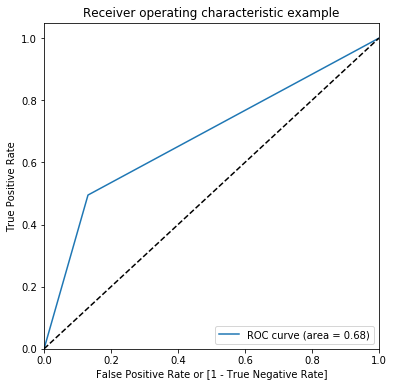

(array([0.        , 0.13118664, 1.        ]),
 array([0.        , 0.49497717, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [61]:
draw_roc(y_pred_final.Converted, y_pred_final.predicted)

In [62]:
#draw_roc(y_pred_final.Converted, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.Converted, y_pred_final.Converted_Prob))

'0.65'

## Running Your First Training Model

In [63]:
logmodel=LogisticRegression()

In [64]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
prediction=logmodel.predict(X_test)

In [66]:
from sklearn.metrics import classification_report
classification_report(y_test , prediction)

'             precision    recall  f1-score   support\n\n          0       0.72      0.87      0.79      1677\n          1       0.71      0.49      0.58      1095\n\navg / total       0.72      0.72      0.71      2772\n'

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[1457,  220],
       [ 553,  542]], dtype=int64)

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.7211399711399712